Demo Practical 2

Import modules:

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

Import utils:

In [3]:
import sys
#sys.path.append("..")
import utils

Load data:

In [4]:
path = "era5_monthly.nc"
data = xr.open_dataset(path)
data

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, time: 519)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-19 07:47:40 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

Use plot_datarray_map():

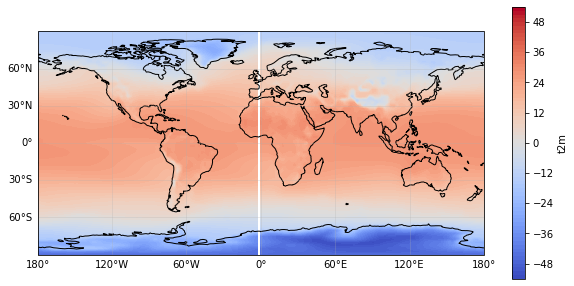

In [5]:
# any keywords are passed to plt.contourf()
utils.plot_dataarray_map(data.t2m.mean("time") - 273.15, levels=100, cmap="coolwarm")
plt.show()

---
The following code was used to produce the plots on the intro_practical2 slides.

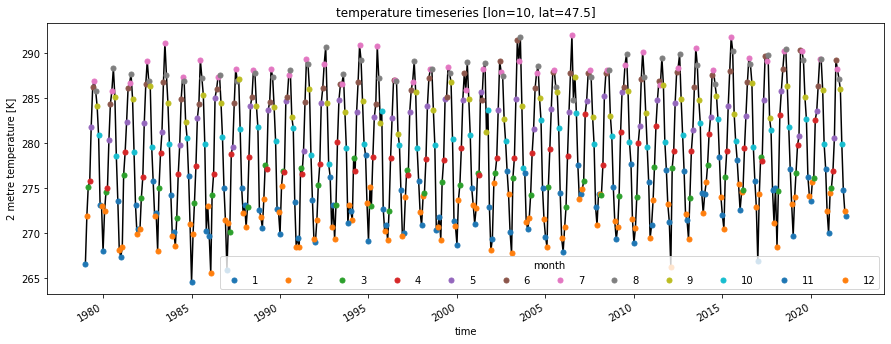

In [6]:
t2m_ger = data.t2m.sel(longitude=10, latitude=47.5)

plt.figure(figsize=(15,5))
t2m_ger.plot(c="black", marker="", markersize=5)
for month, ds in t2m_ger.groupby("time.month"):
    ds.plot(marker="o", markersize=5, ls="", label=month)
plt.legend(ncol=12, title="month")
plt.title("temperature timeseries [lon=10, lat=47.5]")
plt.show()

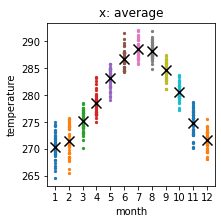

In [7]:
plt.figure(figsize=(3,3))
for month, da in t2m_ger.groupby("time.month"):
    y = da
    x = np.ones_like(da) * month
    plt.scatter(x, y, s=5)
    plt.scatter([month], y.mean(), marker="x", s=100, c="black")
plt.xlabel("month")
plt.ylabel("temperature")
plt.title("x: average")
plt.xticks(np.arange(1,13))
plt.show()

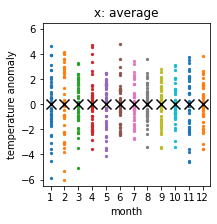

In [8]:
t2m_ger_clim = t2m_ger.groupby("time.month").mean()
t2m_ger_anom = t2m_ger.groupby("time.month") - t2m_ger_clim

plt.figure(figsize=(3,3))
for month, da in t2m_ger_anom.groupby("time.month"):
    y = da
    x = np.ones_like(da) * month
    plt.scatter(x, y, s=5)
    plt.scatter([month], y.mean(), marker="x", s=100, c="black")
plt.xlabel("month")
plt.ylabel("temperature anomaly")
plt.title("x: average")
plt.xticks(np.arange(1,13))
plt.ylim(-6.5, 6.5)
plt.show()

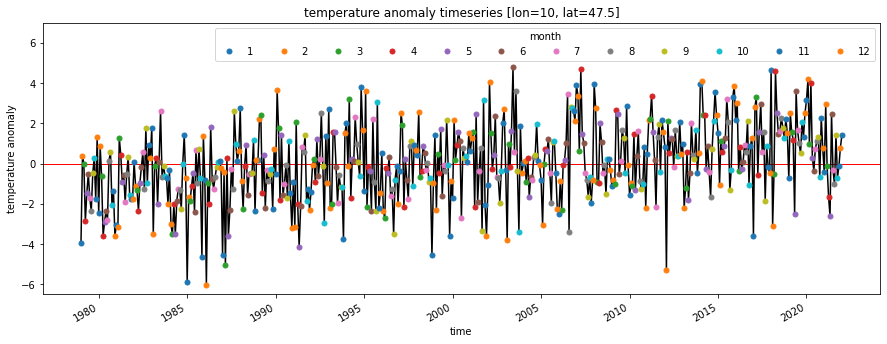

In [59]:
plt.figure(figsize=(15,5))
t2m_ger_anom.plot(c="black")
plt.axhline(0, lw=1, zorder=-5, c='r')
for month, ds in t2m_ger_anom.groupby("time.month"):
    ds.plot(marker="o", markersize=5, ls="", label=month)
plt.legend(ncol=12, title="month")
plt.ylim(-6.5, 7)
plt.ylabel("temperature anomaly")
plt.title("temperature anomaly timeseries [lon=10, lat=47.5]")
plt.show()

TASK 2

Ex 1

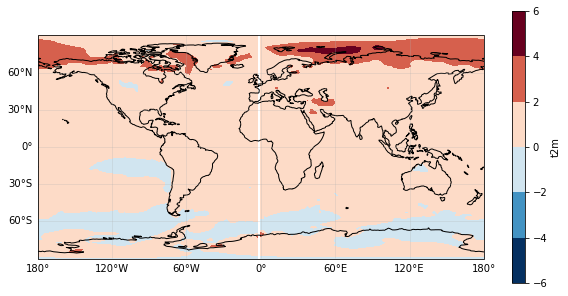

In [10]:
time1 = data.sel(time = slice("1980","1990"))
time2 = data.sel(time = slice("2010","2020"))

utils.plot_dataarray_map(time2.t2m.mean(dim="time")-time1.t2m.mean(dim="time"))

Ex 2

Text(0, 0.5, 'temperature')

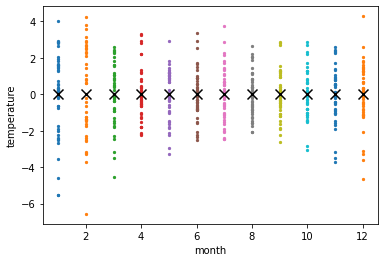

In [23]:
temp_ger = data.t2m.sel(longitude = slice(5,15), latitude = slice(55,47.5)).mean(dim=["latitude","longitude"])

clim_ger = temp_ger.groupby("time.month").mean()
anom_ger = temp_ger.groupby("time.month") - clim_ger

for month, da in anom_ger.groupby("time.month"):
    y = da
    x = np.ones_like(da) * month
    plt.scatter(x, y, s=5)
    plt.scatter([month], y.mean(), marker="x", s=100, c="black")
plt.xlabel("month")
plt.ylabel("temperature")

In [37]:
print("Maximum Anomaly:\t" + str(anom_ger.idxmax(dim='time').values) + "\tby\t" + str(anom_ger.max(dim='time').values) + " °C")
print("Minimum Anomaly:\t" + str(anom_ger.idxmin(dim='time').values) + "\tby\t" + str(anom_ger.min(dim='time').values) + " °C")

Maximum Anomaly:	2015-12-01T00:00:00.000000000	by	4.283111572265625 °C
Minimum Anomaly:	1986-02-01T00:00:00.000000000	by	-6.566986083984375 °C


Text(0.5, 1.0, 'Seasonal anomalies between climatologies of 1980-90 and 2010-20')

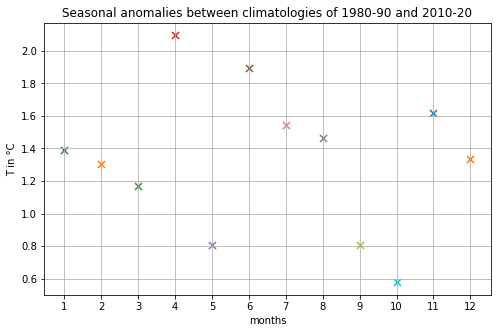

In [68]:
clim_1985 = temp_ger.sel(time = slice('1980','1990')).groupby('time.month').mean()
clim_2015 = temp_ger.sel(time = slice('2010','2020')).groupby('time.month').mean()
clim_anom = clim_2015 - clim_1985

plt.figure(figsize=(8,5))
for month, da in clim_anom.groupby('month'):
    x = np.ones_like(da)*month
    y = da
    plt.scatter(x, y, s=50, marker='x')
plt.xlabel('months')
plt.xticks(np.arange(1,13))
plt.grid()
plt.ylabel('T in °C')
plt.title('Seasonal anomalies between climatologies of 1980-90 and 2010-20')

##### 